In [19]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/50_Startups_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [6]:
df.shape

(50, 6)

In [7]:

data_types_all_columns=df.dtypes
data_types_all_columns

Unnamed: 0           int64
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
df.isnull().sum()
#data is already cleaned

Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
num_var = df.select_dtypes(exclude='object')
for i in num_var:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    UL = q3 + 1.5 * IQR
    LL = q1 - 1.5 * IQR
    print('Number of Outliers in dataset df3', i, ' = ', (df.shape[0] - df[(df[i] < UL) | (df[i] > LL)].shape[0]))
    print(' ')

  #no outliers are present

Number of Outliers in dataset df3 Unnamed: 0  =  0
 
Number of Outliers in dataset df3 R&D Spend  =  0
 
Number of Outliers in dataset df3 Administration  =  0
 
Number of Outliers in dataset df3 Marketing Spend  =  0
 
Number of Outliers in dataset df3 Profit  =  0
 



#no need of cleaning further as their is no null values and no outliers are present is the data




In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49
3,144372.51,118671.95,383199.72,New York,182902.09
4,142107.44,91391.87,366168.52,Florida,166188.04


In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [15]:
df.drop(columns=['Unnamed: 0'],inplace=True)

<ipython-input-21-f9e63d3828b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


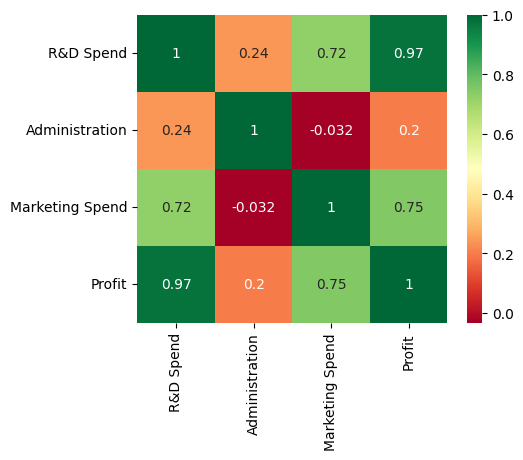

In [21]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,4))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print(top_corr_features)

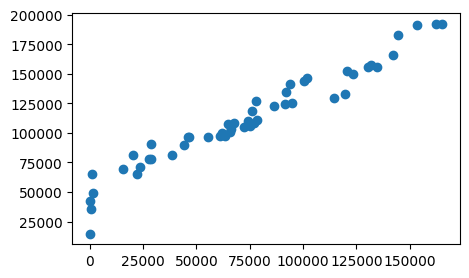

In [22]:
# relation between the features
plt.figure(figsize=(5,3))
plt.scatter(df['R&D Spend'],df['Profit'])
plt.show()

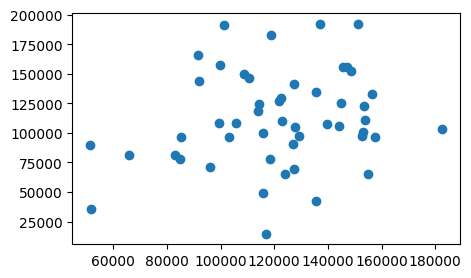

In [23]:
plt.figure(figsize=(5,3))
plt.scatter(df['Administration'],df['Profit'])
plt.show()

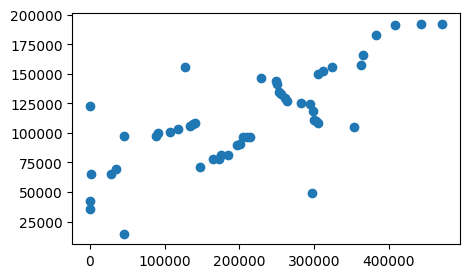

In [24]:
plt.figure(figsize=(5,3))
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.show()

In [26]:
df.groupby('State')['Profit'].mean().round(0).astype(int).reset_index(name='Avg')

,State,Avg
0,California,103905
1,Florida,118774
2,New York,113757


In [27]:
df['New_York']=np.where(df['State']=='New York',1,0)
df['California_']=np.where(df['State']=='California',1,0)
df['Florida_']=np.where(df['State']=='Florida',1,0)

In [29]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New_York,California_,Florida_
0,165349.30,136897.90,471784.20,New York,192261.93,1,0,0
1,162597.80,151377.69,443898.63,California,191792.16,0,1,0
2,153441.61,101145.65,407934.64,Florida,191050.49,0,0,1
3,144372.51,118671.95,383199.72,New York,182902.09,1,0,0
4,142107.44,91391.87,366168.52,Florida,166188.04,0,0,1


In [30]:
df.drop(columns=['State'],inplace=True)

In [31]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,New_York,California_,Florida_
0,165349.30,136897.90,471784.20,192261.93,1,0,0
1,162597.80,151377.69,443898.63,191792.16,0,1,0
2,153441.61,101145.65,407934.64,191050.49,0,0,1
3,144372.51,118671.95,383199.72,182902.09,1,0,0
4,142107.44,91391.87,366168.52,166188.04,0,0,1


In [32]:
dependent_varible=df['Profit']

In [33]:
dependent_varible

0     192261.93
1     191792.16
2     191050.49
3     182902.09
4     166188.04
5     156991.22
6     156122.61
7     155752.70
8     152211.87
9     149760.06
10    146122.05
11    144259.50
12    141585.62
13    134307.45
14    132602.75
15    129917.14
16    126993.03
17    125370.47
18    124267.00
19    122776.96
20    118474.13
21    111313.12
22    110352.35
23    108734.09
24    108552.14
25    107404.44
26    105733.64
27    105008.41
28    103282.48
29    101004.74
30     99937.69
31     97483.66
32     97427.94
33     96779.02
34     96712.90
35     96479.61
36     90708.29
37     89949.24
38     81229.16
39     81005.86
40     78240.01
41     77798.93
42     71498.59
43     69759.08
44     65200.43
45     64926.18
46     49490.85
47     42559.83
48     35673.51
49     14681.50
Name: Profit, dtype: float64

In [34]:
df.drop(columns=['Profit'],inplace=True)

In [35]:
independent_variable=df

In [36]:
independent_variable.head()

,R&D Spend,Administration,Marketing Spend,New_York,California_,Florida_
0,165349.30,136897.90,471784.20,1,0,0
1,162597.80,151377.69,443898.63,0,1,0
2,153441.61,101145.65,407934.64,0,0,1
3,144372.51,118671.95,383199.72,1,0,0
4,142107.44,91391.87,366168.52,0,0,1


In [38]:
X=independent_variable
Y=dependent_varible


In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [40]:
X_train[:10]

,R&D Spend,Administration,Marketing Spend,New_York,California_,Florida_
33,55494.05,103057.59,214634.91,0,0,1
35,46014.12,85047.54,205517.74,1,0,0
26,75328.97,144136.08,134050.17,0,0,1
34,46426.17,157694.02,210797.77,0,1,0
18,91749.26,114175.89,294919.67,0,0,1
7,130298.23,145530.16,323876.78,0,0,1
14,119943.34,156547.52,256513.02,0,0,1
45,1000.33,124153.14,1904.03,1,0,0
48,542.15,51743.25,0.10,1,0,0
29,65605.58,153032.16,107138.48,1,0,0


In [41]:
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [42]:
X_train

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ],
       [0.69261666, 0.67036159, 0.55486446, 1.        , 0.        ,
        0.        ],
       [0.37493063, 0

In [43]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [44]:
regressor.intercept_

44154.054667848555

In [45]:
Y_pred_train=regressor.predict(X_train)

In [55]:
Y_train[:10].round(0)

33     96779.0
35     96480.0
26    105734.0
34     96713.0
18    124267.0
7     155753.0
14    132603.0
45     64926.0
48     35674.0
29    101005.0
Name: Profit, dtype: float64

In [54]:
Y_pred_train[:10].round(0)

array([ 95765.,  89165., 109507.,  91366., 127112., 159019., 148906.,
        48180.,  45374., 102952.])

In [48]:
Y_pred=regressor.predict(X_test)

In [49]:
Y_test


28    103282.48
11    144259.50
10    146122.05
41     77798.93
2     191050.49
27    105008.41
38     81229.16
31     97483.66
22    110352.35
4     166188.04
Name: Profit, dtype: float64

In [50]:
Y_pred

array([103015.30159796, 132582.37760816, 132447.83845174,  71976.19851258,
       178537.58221055, 116161.34230165,  67851.79209676,  98791.83374687,
       113969.53533012, 167921.1656955 ])

In [57]:
Y_pred[:10].round(0)

array([103015., 132582., 132448.,  71976., 178538., 116161.,  67852.,
        98792., 113970., 167921.])

In [51]:
r2_score(Y_train,Y_pred_train)*100

95.01847627493606

In [52]:
r2_score(Y_test,Y_pred)*100

93.47068473282424

As R2 score is high and freatures are less so we will not apply further Ridge and Lasso to increase the r2 score
